In [1]:
import pandas as pd

In [2]:
Intakes = pd.read_csv(r"C:/Users/bbsj4/Desktop/Data Analyst Cert Treehouse/UNIT_5/Project5/archive/aac_intakes.csv")


In [3]:
Outcomes = pd.read_csv(r"C:/Users/bbsj4/Desktop/Data Analyst Cert Treehouse/UNIT_5/Project5/archive/aac_outcomes.csv")

In [4]:
Intakes.head()

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
1,11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,NaN,Intact Female
3,4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
4,2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male


In [5]:
Outcomes.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [6]:
Intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80187 entries, 0 to 80186
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_intake   80187 non-null  object
 1   animal_id         80187 non-null  object
 2   animal_type       80187 non-null  object
 3   breed             80187 non-null  object
 4   color             80187 non-null  object
 5   datetime          80187 non-null  object
 6   datetime2         80187 non-null  object
 7   found_location    80187 non-null  object
 8   intake_condition  80187 non-null  object
 9   intake_type       80187 non-null  object
 10  name              55603 non-null  object
 11  sex_upon_intake   80186 non-null  object
dtypes: object(12)
memory usage: 7.3+ MB


In [8]:
Outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80681 entries, 0 to 80680
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  80673 non-null  object
 1   animal_id         80681 non-null  object
 2   animal_type       80681 non-null  object
 3   breed             80681 non-null  object
 4   color             80681 non-null  object
 5   date_of_birth     80681 non-null  object
 6   datetime          80681 non-null  object
 7   monthyear         80681 non-null  object
 8   name              56116 non-null  object
 9   outcome_subtype   36893 non-null  object
 10  outcome_type      80667 non-null  object
 11  sex_upon_outcome  80679 non-null  object
dtypes: object(12)
memory usage: 7.4+ MB


Question 1:
Is there an area where more pets are found?
Find the top 5 places where animals are found so the shelter can coordinate with local volunteers and animal control to monitor these areas.

In [12]:
Intakes['found_location'].value_counts().head(5)

Austin (TX)                          14443
Outside Jurisdiction                   948
Travis (TX)                            921
7201 Levander Loop in Austin (TX)      517
Del Valle (TX)                         411
Name: found_location, dtype: int64

Question 2:	What is the average number of pets found in a month in the year 2015? Are there months where there is a higher number of animals found? Knowing the number of pets the shelter might see in a month can help them gather enough resources and donations to care for the animals they receive. 

To answer this question, I first split the date column into one for years and one for months. 
Next, the variable intakes_year_2015 was created to find out the total number of pets found in 2015. Then, divide by 12 (12 months per year).

Last, I found the number of intakes each month and sorted them from the greatest to the least. 
By looking at the first three numbers (and correlating the month number with the name), we see the highest numbers found. 

In [7]:
Intakes['year'] = pd.DatetimeIndex(Intakes.datetime).year
Intakes['month'] = pd.DatetimeIndex(Intakes.datetime).month 
intakes_year_2015 = Intakes[Intakes.year == 2015].count()
print(intakes_year_2015)


age_upon_intake     18712
animal_id           18712
animal_type         18712
breed               18712
color               18712
datetime            18712
datetime2           18712
found_location      18712
intake_condition    18712
intake_type         18712
name                13235
sex_upon_intake     18712
year                18712
month               18712
dtype: int64


In [11]:
int(18712/12)

1559

In [12]:
Intakes.groupby('month').size().sort_values(ascending=False)

month
5     7976
10    7674
6     7473
3     6842
11    6629
7     6550
8     6511
9     6507
12    6131
4     6119
1     6025
2     5750
dtype: int64

Answer to question 2:
In 2015, 1559 pets were found on average (n= 1559). 
The months where the highest number of pets were found, taking into account all months is represented above:
May (n=7976), October (n=7674), and June (n=7473)

Then, I realized maybe you wanted the three months the most pets were found in 2015, so that is below:
The months are the same, but in a different order: June (n=2189), May (n=2094), and October (n=1740)

In [14]:
Intakes[Intakes.year == 2015].groupby('month').size().sort_values(ascending=False)

month
6     2189
5     2094
10    1740
8     1718
7     1635
9     1591
4     1543
11    1411
3     1346
1     1198
12    1128
2     1119
dtype: int64

In [7]:
combined = pd.read_csv(r"C:/Users/bbsj4/Desktop/Data Analyst Cert Treehouse/UNIT_5/Project5/archive/aac_intakes_outcomes.csv")

In [8]:
combined.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [9]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome            79672 non-null  object 
 1   animal_id_outcome           79672 non-null  object 
 2   date_of_birth               79672 non-null  object 
 3   outcome_subtype             36348 non-null  object 
 4   outcome_type                79662 non-null  object 
 5   sex_upon_outcome            79671 non-null  object 
 6   age_upon_outcome_(days)     79672 non-null  int64  
 7   age_upon_outcome_(years)    79672 non-null  float64
 8   age_upon_outcome_age_group  79672 non-null  object 
 9   outcome_datetime            79672 non-null  object 
 10  outcome_month               79672 non-null  int64  
 11  outcome_year                79672 non-null  int64  
 12  outcome_monthyear           79672 non-null  object 
 13  outcome_weekday             796

Question 3. What is the ratio of incoming pets vs. adopted pets? This key metric helps the shelter know how they are doing.

In [15]:
len(Outcomes[Outcomes.outcome_type == 'Adoption'])


34232

total adopted= 34,232
Then, I need to divide total incoming (n=80187) by that result

In [17]:
80187/34232

2.3424573498480954

In [18]:
34232/80187

0.4269021163031414

Question 3 answer: for every 2.3 animal taken in, 1 is adopted. Since you don't have .3 of an animal, you would say the adoption rate is about 43% or you could say that for every 7 animals taken in, about 3 are adopted. If you wanted to really roughly round, you could say that 1 out of every 2 animals is adopted (50%)- however, that would not be very exact (although it would sound better if you were for example talking to someone potentially providing money to the shelter). 

Question 4. What is the distribution of the types of animals in the shelter? Find the count of each type of animal in the shelter. 

In [16]:
types = Intakes.groupby('animal_type').size()
print(types)

animal_type
Bird           342
Cat          29659
Dog          45743
Livestock        9
Other         4434
dtype: int64


79672 is the total number of animals per the info table count of animal_type


In [19]:
342/79672

0.004292599658600261

In [20]:
29659/79672

0.3722637815041671

In [21]:
45743/79672

0.5741414800682799

In [22]:
9/79672

0.00011296314891053319

In [23]:
4434/79672

0.05565317802992268

In [27]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Animal Types')

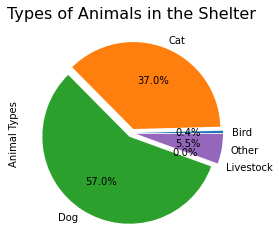

In [32]:
labels = 'Bird', 'Cat', 'Dog', 'Livestock', 'Other'
values = [342, 29659, 45743, 9, 4434]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(values, explode=explode, labels=labels, autopct="%.1f%%")
plt.title('Types of Animals in the Shelter', fontsize=16)
plt.ylabel('Animal Types')


The following is the distribution of animals by type in the shelter:
Dogs= 57% (n=45743), Cats=37% (n=29659), Other=5.5% (n=4434), Bird=0.4% (n=342). There are 9 livestock that account for far less than 1%. 

I calculated this multiple ways. I obtained the percentages via division of the count per type by the total. Then, just for fun, I imported matplotlib to make a pie chart. 

Question 5.	What are the adoption rates for specific breeds? Find the top 5 dog breeds in the shelter (based on count) and then find the adoption percentage of each breed. 

In [35]:
dogs_adopted = [combined[combined.outcome_type == 'Adoption']]
breed_adopted = dogs_adopted.groupby('breed').size()
breed_adopted.head()



AttributeError: 'list' object has no attribute 'groupby'

In [ ]:
adoption percentage per breed

Question 6.	What are the adoption rates for different colorings? Find the top 5 colorings in the shelter (based on count) and then find the adoption percentage of each color. 

In [27]:
Intakes['color'].value_counts().head(5)

Black/White    8340
Black          6710
Brown Tabby    4487
Brown          3618
White          2849
Name: color, dtype: int64

In [ ]:
adoption percentage for each of the above

Question 7.	About how many animals are spayed/neutered each month? This will help the shelter allocate resources and staff. Assume that all intact males and females will be spayed/neutered. 

In [ ]:
This question is not very clear. However, possibly:
Count of sex_upon_outcome = neutered male OR spayed female
Find the total number represented in the table and divide the count above by number of months


In [ ]:
Make sure to include explanation of how I answered each question in the markdowns. 